<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/Forecasting(Cocacola_Sales)Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
data.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
data.tail(10)

,Quarter,Sales
32,Q1_94,3352.0
33,Q2_94,4342.0
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

In [ ]:
data.duplicated().value_counts()

False    42
dtype: int64

In [ ]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [ ]:
data.corr()

,Sales
Sales,1.0


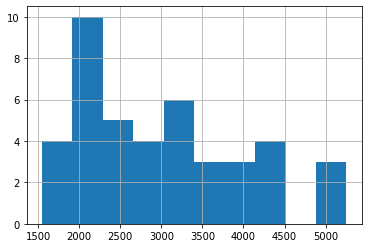

In [ ]:
plt.hist(data['Sales'])
plt.grid("dark")
plt.show()

In [ ]:
data["Sales"].agg(["var","median","skew","kurtosis"])

var         956348.837154
median        2782.376999
skew             0.630162
kurtosis        -0.584372
Name: Sales, dtype: float64

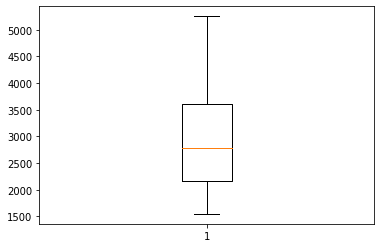

In [ ]:
plt.boxplot(data["Sales"])
plt.show()

In [ ]:
year = []
month = []
for i in data['Quarter']:
    year.append('19'+i[3:])
    if i[:2] == 'Q1':
        month.append('jan')
    elif i[:2] == 'Q2':
        month.append('apr')
    elif i[:2] == 'Q3':
        month.append('jul')
    else:
        month.append('oct')

In [ ]:
data = data.copy()
data['year'] = year
data['month'] = month
data.head()

,Quarter,Sales,year,month
0,Q1_86,1734.827000,1986,jan
1,Q2_86,2244.960999,1986,apr
2,Q3_86,2533.804993,1986,jul
3,Q4_86,2154.962997,1986,oct
4,Q1_87,1547.818996,1987,jan


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   year     42 non-null     object 
 3   month    42 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.4+ KB


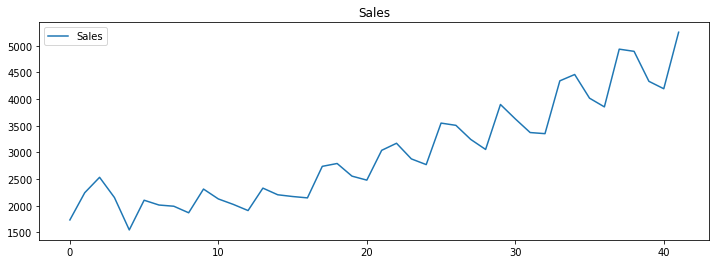

In [ ]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

#**Autocorritation and Partial autocorrilation**

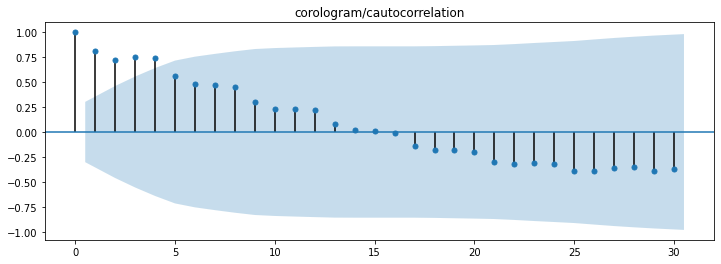

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data.Sales, ax=plt.gca(), lags = 30)
plt.title("corologram/cautocorrelation")
plt.show()

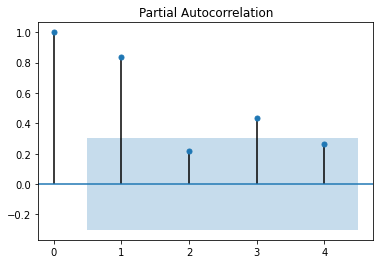

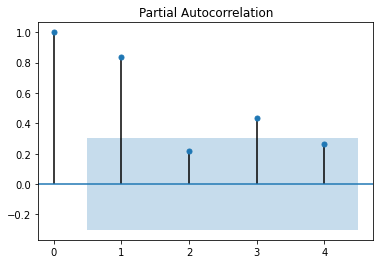

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Sales'], lags = 4)

#**Time Series decompozition**

<Figure size 864x864 with 0 Axes>

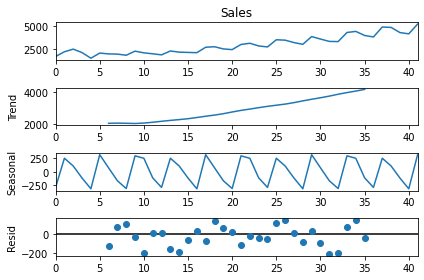

In [ ]:
plt.figure(figsize=(12,12))
import pylab
from pylab import rcParams
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data.Sales, period=12) #additive seasonal index
fig = decomposition.plot()
plt.show()

In [ ]:
#Spliting data
train_len = 30
train = data.iloc[:train_len]
test = data.iloc[train_len:]

#ADF Augmented dickey fuller test





In [ ]:
# testing for stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 1.309421
Critical Values @ 0.05: -2.95
p-value: 0.996661


Here we are accepting the null hypothesis because our p-value is high, which means our data is not stationary. We have to convert into stationary

- Box Cox transforme to make variance constant

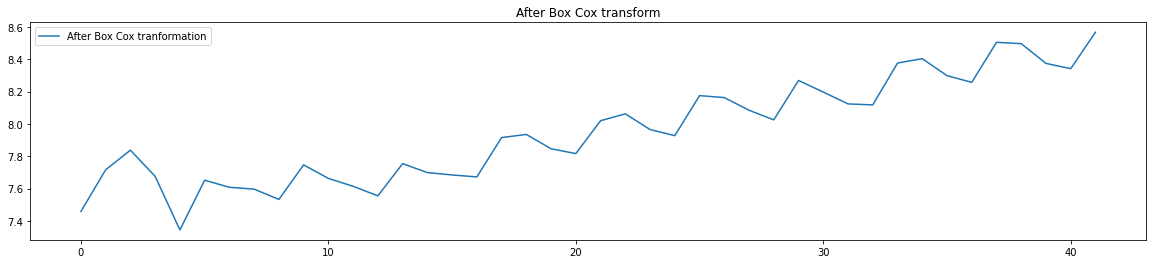

In [ ]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index)

plt.figure(figsize=(20,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

- Difference removeing trend

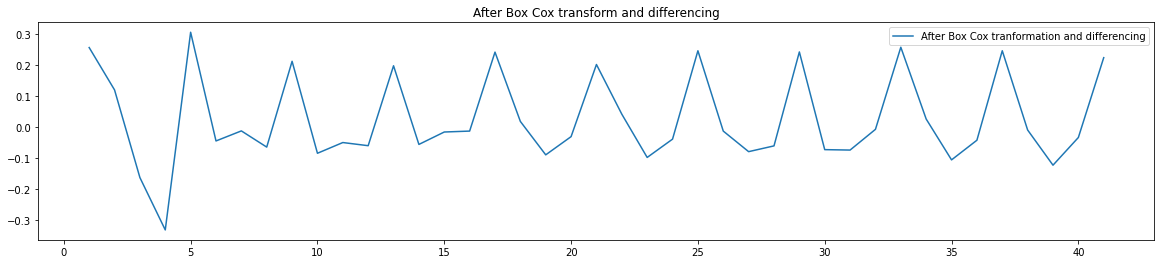

In [ ]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(20,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [ ]:
data_boxcox_diff.dropna(inplace=True)

Cheacking ADF after removing differnce trend

In [ ]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.190392
Critical Values @ 0.05: -2.95
p-value: 0.020548


Now we can say that our data has become Stationary

# Sample time series methods or Basic Forcast model
## Navi method

In [ ]:
y_hat_naive = test.copy()
y_hat_naive['naive_forcast'] = train['Sales'][train_len-1]

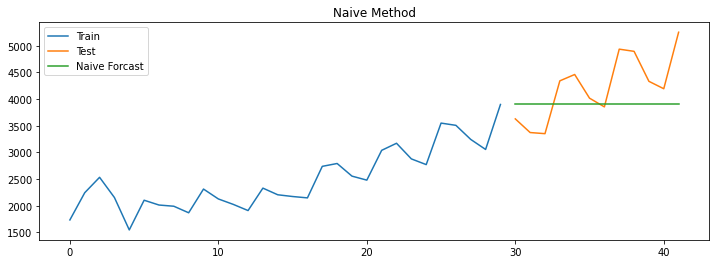

In [ ]:
# Ploting train,test and forcasting
plt.figure(figsize=(12,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test') 
plt.plot(y_hat_naive['naive_forcast'],label='Naive Forcast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_naive['naive_forcast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forcast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,667.89,12.54


#Simple Average Method

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forcast'] = train['Sales'].mean()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_avg['avg_forcast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forcast'])/test['Sales'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Average Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = pd.concat([results,tempresults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,667.89,12.54
0,Simple Average Method,1813.01,39.49


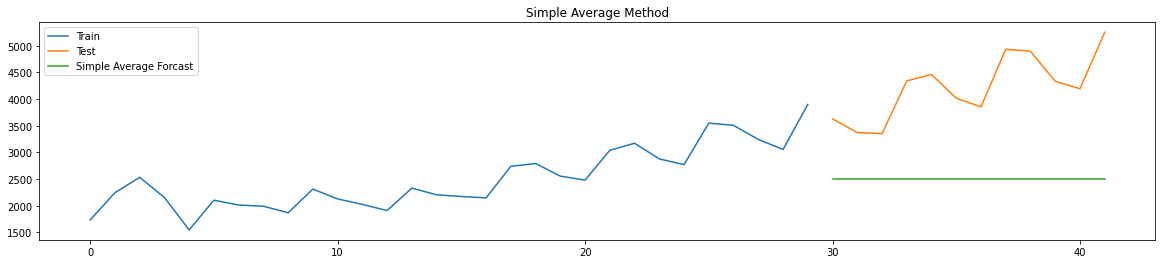

In [ ]:
#Ploting train, test and forcast
plt.figure(figsize=(20,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test') 
plt.plot(y_hat_avg['avg_forcast'],label='Simple Average Forcast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

#Simple Moving Average Method

In [ ]:
y_hat_sma = data.copy()
ma_window = 4
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

smaresults = pd.DataFrame({'Method':['Simple Moving Average Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = pd.concat([results,smaresults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,667.89,12.54
0,Simple Average Method,1813.01,39.49
0,Simple Moving Average Method,986.03,17.83


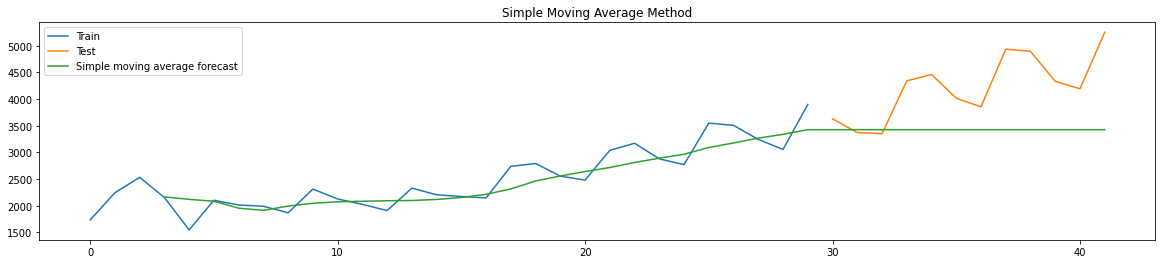

In [ ]:
#Ploting train, test and forcast
plt.figure(figsize=(20,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test') 
plt.plot(y_hat_sma['sma_forecast'],label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#Holt Winter's multiplicative method with trend and seasonality

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods=4, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hum = test.copy()
y_hat_hum['hum_forecast'] = model_fit.forecast(12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


{'smoothing_level': 0.3230064185027905, 'smoothing_trend': 0.30241951618983154, 'smoothing_seasonal': 0.41694135408381683, 'damping_trend': nan, 'initial_level': 2188.805669798787, 'initial_trend': -29.284495984365044, 'initial_seasons': array([0.83735122, 1.09826133, 1.15916971, 1.07506874]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_hum['hum_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hum['hum_forecast'])/test['Sales'])*100,2)

hwresults = pd.DataFrame({'Method':['Holt Mutiplicative Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = pd.concat([results,hwresults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,667.89,12.54
0,Simple Average Method,1813.01,39.49
0,Simple Moving Average Method,986.03,17.83
0,Holt Mutiplicative Method,202.51,4.34


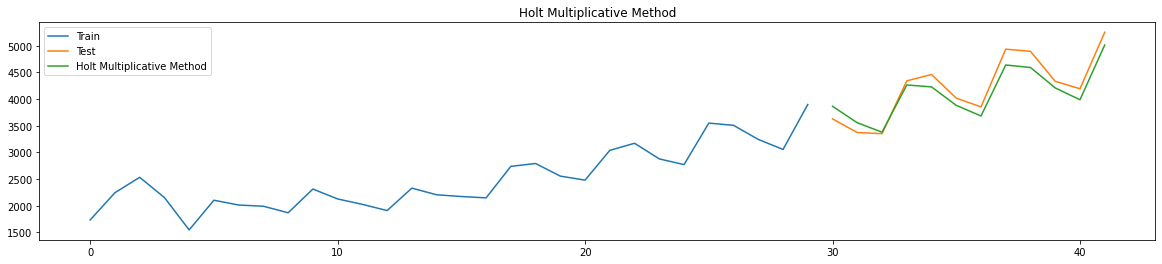

In [ ]:
#Ploting train, test and forcast
plt.figure(figsize=(20,4))
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test') 
plt.plot(y_hat_hum['hum_forecast'],label='Holt Multiplicative Method')
plt.legend(loc='best')
plt.title('Holt Multiplicative Method')
plt.show()

_**Observation** :- By using Holt Multiplicative Method it is giving us best results and our error is also less_ 